## Importing data

In [1]:
# This code installs the yfinance library, which allows you to access financial data from Yahoo Finance
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# Import the yfinance library and assign it to the alias 'yf'
import yfinance as yf

# Create a list of tickers for the stocks you want to retrieve data for
list_tickers = ['CL=F','^GSPC', '^TNX', 'XOM']

# Use the Tickers() function from yfinance to create an object for each ticker in the list
tickers = yf.Tickers(list_tickers)

# Use the download() function from yfinance to download the stock data for the specified date range
data = yf.download(list_tickers,  start="2007-06-01", end="2022-07-01")

# Extract the 'Close' column from the dataframe
data = data['Close']

# Print the dataframe
data


[*********************100%***********************]  4 of 4 completed


,CL=F,XOM,^GSPC,^TNX
Date,,,,
2007-06-01,65.080002,84.220001,1536.339966,4.956
2007-06-04,66.209999,84.220001,1539.180054,4.929
2007-06-05,65.610001,84.260002,1530.949951,4.976
2007-06-06,65.959999,83.620003,1517.380005,4.970
2007-06-07,66.930000,81.959999,1490.719971,5.099
...,...,...,...,...
2022-06-24,107.620003,86.900002,3911.739990,3.125
2022-06-27,109.570000,89.029999,3900.110107,3.194
2022-06-28,111.760002,91.500000,3821.550049,3.206


In [3]:
# Remove all rows with missing values (NaN) from the dataframe
data = data.dropna()

# Check if the dataframe still contains any missing values
# returns False if there is no missing values
data.isnull().values.any()

False

##Statistical analysis 

In [4]:
## Compute the Pearson's correlation coefficient between the columns
corr_matrix = data.corr()
print(corr_matrix)

           CL=F       XOM     ^GSPC      ^TNX
CL=F   1.000000  0.478751 -0.283245  0.445553
XOM    0.478751  1.000000 -0.369685  0.400259
^GSPC -0.283245 -0.369685  1.000000 -0.533662
^TNX   0.445553  0.400259 -0.533662  1.000000


In [5]:
## The spearmanr function returns two values: the Spearman's rank correlation coefficient (corr) and the p-value. The p-value can be used 
## to assess the statistical significance of the correlation. A small p-value (typically less than 0.05) 
## indicates that the correlation is statistically significant, while a large p-value suggests that the correlation may not be meaningful.

from scipy.stats import spearmanr

# Compute the Spearman's rank correlation matrix
corr_matrix = data.corr(method='spearman')

# Extract the column names
column_names = data.columns

# Loop through all pairs of variables
for i in range(len(column_names)):
    for j in range(i+1, len(column_names)):
        # Extract the columns of interest
        x = data[column_names[i]].values
        y = data[column_names[j]].values
        
        # Compute the Spearman's rank correlation coefficient and p-value
        corr, p_value = spearmanr(x, y)
        
        print(f'Spearman\'s rank correlation coefficient between {column_names[i]} and {column_names[j]}: {corr:.3f}')
        print(f'p-value: {p_value:.3f}')


Spearman's rank correlation coefficient between CL=F and XOM: 0.449
p-value: 0.000
Spearman's rank correlation coefficient between CL=F and ^GSPC: -0.368
p-value: 0.000
Spearman's rank correlation coefficient between CL=F and ^TNX: 0.428
p-value: 0.000
Spearman's rank correlation coefficient between XOM and ^GSPC: -0.162
p-value: 0.000
Spearman's rank correlation coefficient between XOM and ^TNX: 0.229
p-value: 0.000
Spearman's rank correlation coefficient between ^GSPC and ^TNX: -0.555
p-value: 0.000


# Descriptive statistics



In [6]:
# Compute the descriptive statistics
stats = data.describe()

# Print the statistics
print(stats)

              CL=F          XOM        ^GSPC         ^TNX
count  3795.000000  3795.000000  3795.000000  3795.000000
mean     72.404379    77.762809  2140.631904     2.458397
std      23.799346    14.021281   982.681021     0.894163
min     -37.630001    31.450001   676.530029     0.499000
25%      52.174999    70.085003  1337.885010     1.827000
50%      70.800003    81.160004  1979.260010     2.373000
75%      93.020000    87.239998  2747.085083     2.971500
max     145.289993   104.589996  4796.560059     5.248000


In [7]:
# Select specific columns from the dataframe
data = data[['CL=F','^GSPC', '^TNX', 'XOM']]

# Import numpy and train_test_split function from sklearn
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into a training and test set, with a 80/20 split
# test_size = 0.2 means 20% of the data will be used for testing
training_set, test_set = train_test_split(data, test_size=0.2)

# Convert the training and test sets to numpy arrays
training_set = training_set.values
test_set = test_set.values

In [8]:
# Check the shape of the test set
# The output will be the number of rows and columns in the test set
test_set.shape

(759, 4)

In [9]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
sc = StandardScaler()

# Fit the StandardScaler to the training set and transform it
# This centers and scales the data so that the mean is 0 and the standard deviation is 1
training_set_scaled = sc.fit_transform(training_set)

# Apply the same scaling to the test set
test_set_scaled = sc.transform(test_set)

In [10]:
# Create the training set for the independent variables (X_train)
# This is all columns except the last column in the training set (scaled)
X_train = training_set_scaled[:,:-1]

# Create the training set for the dependent variable (y_train)
# This is the last column in the training set (scaled)
y_train = training_set_scaled[:,-1]

# Print the X_train and y_train to check the data
X_train, y_train

(array([[ 1.34277516,  2.51510463, -0.06937085],
        [ 1.27620983, -0.23027325,  0.14482278],
        [-0.00370323,  0.77496731,  0.70971738],
        ...,
        [-0.14989477,  2.07019353, -0.92947559],
        [ 0.0325287 , -1.10349557,  1.27350198],
        [-1.02535848,  0.05234031, -0.15704602]]),
 array([ 0.32331184,  1.6010078 ,  0.61614657, ..., -1.17915129,
        -0.92814986,  0.62890937]))

In [11]:
# Create the test set for the independent variables (X_test)
# This is all columns except the last column in the test set (scaled)
X_test = test_set_scaled[:,:-1]

# Create the test set for the dependent variable (y_test)
# This is the last column in the test set (scaled)
y_test = test_set_scaled[:,-1]

In [12]:
X_train.shape

(3036, 3)

MODEL.PY

In [13]:
from tensorflow import keras
import numpy as np
import tensorflow as tf

In [14]:
num_unique_vals = [
      len(np.unique(X_train[:, i])) for i in range(X_train.shape[-1])
  ]
num_units = [
      min(1000, i * 2) for i in num_unique_vals
  ]
num_inputs = X_train.shape[-1]

In [15]:
def create_nam_model(x_train,
                     dropout,
                     feature_dropout = 0.0,
                     num_basis_functions = 1000,
                     units_multiplier = 2,
                     activation = 'relu',
                     trainable = True):
  num_unique_vals = [
      len(np.unique(x_train[:, i])) for i in range(x_train.shape[-1])
  ]
  num_units = [
      min(num_basis_functions, i * units_multiplier) for i in num_unique_vals
  ]
  num_inputs = x_train.shape[-1]
  nn_model = NAM(
      x_train = x_train,
      num_inputs=num_inputs,
      num_units=num_units,
      feature_dropout= feature_dropout,
      dropout=np.float32(dropout),
      trainable=trainable)
  return nn_model


# Define the __init__ method that initializes the object instance.
# It takes the following arguments:
# - embed_dim: integer specifying the embedding dimension (default is 23)
# - num_heads: integer specifying the number of attention heads (default is 10)
# - ff_dim: integer specifying the size of the feedforward network (default is 10)
# - rate: float specifying the dropout rate (default is 0.1)
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim=23, num_heads=10, ff_dim=10, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="elu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        
# Define the call method to implement the forward pass of the layer.
# It takes the following arguments:
# - inputs: the input tensor
# - training: boolean flag indicating whether the layer is in training mode (default is True)
    def call(self, inputs, training=True):

        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen=200, seq_size=200, embed_dim=23):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=seq_size, output_dim=embed_dim)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

class Transformer(tf.keras.Model):
    def __init__(self, input_dim, seq_len, output_dim=1):
        super(Transformer, self).__init__()
        self.input_dim = input_dim
        self.seq_len = seq_len
        self.output_dim = output_dim
        self.embedding_layer = TokenAndPositionEmbedding(seq_size=input_dim, maxlen=seq_len)
        self.transformer_block = TransformerBlock()
        self.gap1d = tf.keras.layers.GlobalAveragePooling1D()
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.dense = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        x = self.embedding_layer(inputs)
        x = self.transformer_block(x)
        x = self.gap1d(x)
        x = self.dropout(x)
        outputs = self.dense(x)
        return outputs

class NAM(tf.keras.Model):
  def __init__(self,
               x_train,
               num_inputs,
               num_units,
               feature_dropout,
               dropout = 0.0,
               trainable = True,):
    super(NAM, self).__init__()
    self._num_inputs = num_inputs
    self._x_train = x_train
    self._feature_dropout = feature_dropout
    self._num_units = num_units
    self._dropout = dropout
    self._trainable = trainable
 
  def build(self, input_shape):
    self.transformers = [None] * self._num_inputs
    for i in range(self._num_inputs):
      self.transformers[i] = Transformer(input_dim=self._x_train.shape[-1], seq_len=self._x_train.shape[-2], output_dim=self._num_units)
    self._bias = self.add_weight(
        name='bias',
        initializer=tf.keras.initializers.Zeros(),
        trainable=True,)
    self._true = tf.constant(True, dtype=tf.bool)
    self._false = tf.constant(False, dtype=tf.bool)
 
  def call(self, x, training=True):
    individual_outputs = self.calc_outputs(x, training=training)
    stacked_out = tf.stack(individual_outputs, axis=-1)
    training = self._true if training else self._false
    dropout_out = tf.nn.dropout(
        stacked_out,
        rate=tf.cond(training, lambda: self._feature_dropout, lambda: 0.0))
    out = tf.reduce_sum(dropout_out, axis=-1)
    return out + self._bias

  def calc_outputs(self, x, training=True):
    list_x = tf.split(x, self._num_inputs, axis=-1)
    return [
        self.transformers[i](x_i)
        for i, x_i in enumerate(list_x)
    ]

  def score(self, x, y):
        # Compute model performance metric
        y_pred = self.predict(x)
        return np.mean(y_pred == y)  # Example metric: mean accuracy


In [16]:
tf.compat.v1.reset_default_graph()
TNAM = create_nam_model(
    x_train = X_train, 
    dropout = 0.2,)

_ = TNAM(X_train)
TNAM.summary()

Model: "nam"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (Transformer)   multiple                  92379     
                                                                 
 transformer_1 (Transformer)  multiple                 92379     
                                                                 
 transformer_2 (Transformer)  multiple                 92379     
                                                                 
Total params: 277,138
Trainable params: 277,138
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
# The optimizer is the algorithm used to update the model's weights
# Adam is a popular choice for neural networks
# The loss function measures how well the model is doing, and the optimizer tries to minimize it
# MeanSquaredError is a common choice for regression problems
# The metrics is used to monitor the training and testing steps. It's useful to have an idea of how well the model is doing
TNAM.compile(optimizer=tf.keras.optimizers.Adam() , 
                    loss= tf.keras.losses.MeanSquaredError(),
                    metrics = tf.keras.metrics.RootMeanSquaredError(),)

In [18]:
TNAM.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


95/95 [==============================] - 23s 31ms/step - loss: 1.3651 - root_mean_squared_error: 1.1684
Epoch 2/100
95/95 [==============================] - 1s 15ms/step - loss: 0.6668 - root_mean_squared_error: 0.8166
Epoch 3/100
95/95 [==============================] - 2s 17ms/step - loss: 0.5443 - root_mean_squared_error: 0.7378
Epoch 4/100
95/95 [==============================] - 1s 16ms/step - loss: 0.4933 - root_mean_squared_error: 0.7023
Epoch 5/100
95/95 [==============================] - 2s 17ms/step - loss: 0.4845 - root_mean_squared_error: 0.6961
Epoch 6/100
95/95 [==============================] - 1s 16ms/step - loss: 0.4442 - root_mean_squared_error: 0.6665
Epoch 7/100
95/95 [==============================] - 2s 17ms/step - loss: 0.4329 - root_mean_squared_error: 0.6580
Epoch 8/100
95/95 [==============================] - 2s 22ms/step - loss: 0.4241 - root_mean_squared_error: 0.6512
Epoch 9/100
95/95 [==============================] - 2s 19ms/step - loss: 0.4157 - root_mea

In [19]:
# Evaluate the model on the test set
# This will return the loss and any metrics specified during model compilation
TNAM.evaluate(X_test,y_test)

24/24 [==============================] - 1s 9ms/step - loss: 0.3318 - root_mean_squared_error: 0.5761


[0.3318413496017456, 0.576056718826294]

In [20]:
# Use the model to make predictions on the test set
predicted_stock_price = TNAM.predict(X_test)
y_pred = predicted_stock_price

# Reshape y_test to have the same shape as the predictions
y_test = np.reshape(y_test, (759,1))

# Print the shape of y_test and the predictions to check they match
print("y_test.shape=",y_test.shape,
      "y_pred.shape=",predicted_stock_price.shape)

24/24 [==============================] - 1s 8ms/step
y_test.shape= (759, 1) y_pred.shape= (759, 1)


Uncomment to code below only if you want to plot the real and predicted values.Otherwise you will see the normalized real and normalized predicted values

In [21]:
# # Inverse scaling the training and test set
# training_set_original = sc.inverse_transform(training_set_scaled)
# test_set_original = sc.inverse_transform(test_set_scaled)

# # Extracting the independent and dependent variables for the training set
# # X_train contains all columns except the last column
# X_train = training_set_original[:,:-1]
# # y_train contains only the last column
# y_train = training_set_original[:,-1]

# # Extracting the independent and dependent variables for the test set
# # X_test contains all columns except the last column
# X_test = test_set_original[:,:-1]
# # y_test contains only the last column
# y_test = test_set_original[:,-1]

# # Inverse scaling the predicted stock price
# predicted_stock_price = y_pred*sc.scale_[-1]+sc.mean_[-1]

In [22]:
from sklearn import metrics as sk_metrics


def rmse(y_true, y_pred):
  """Root mean squared error between true and predicted values."""
  return float(np.sqrt(sk_metrics.mean_squared_error(y_true, y_pred)))

def mae(y_true, y_pred):
  """Mean Absolute Error between true and predicted values."""
  return float(sk_metrics.mean_absolute_error(y_true, y_pred)) 
def mse(y_true, y_pred):
  """Mean squared error between true and predicted values."""
  return float(sk_metrics.mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
  """R-squared score between true and predicted values."""
  return float(sk_metrics.r2_score(y_true, y_pred)) 
  
def sigmoid(x):
  """Sigmoid function."""
  if isinstance(x, list):
    x = np.array(x)
  return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))

def calculate_metric(y_true,
                     predictions,
                     regression = True):
  """Calculates the evaluation metric."""
  if regression:
    return mse(y_true, predictions)
  else:
    return sk_metrics.roc_auc_score(y_true, sigmoid(predictions))

In [23]:
# Call function that calculates a specific evaluation metric
test_metric = calculate_metric(y_test, predicted_stock_price, regression=True)

# Print the calculated metric
print(test_metric)

0.3318413746045599


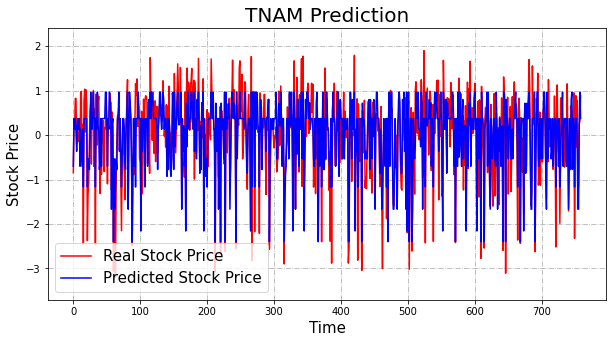

In [24]:
import matplotlib.pyplot as plt

# Set the size of the chart to 10x5 inches
plt.figure(figsize=(10, 5))
# Add a grid to the chart to improve readability
plt.grid(visible=True, linestyle='-.')
# Plot the real stock price in red and the predicted stock price in blue
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
# Set the title of the chart to 'TNAM Prediction' and increase the font size
plt.title('TΝΑΜ Prediction', fontsize=20)
# Set the x-axis label to 'Time' and increase the font size
plt.xlabel('Time', fontsize=15)
# Set the y-axis label to 'Stock Price' and increase the font size
plt.ylabel('Stock Price', fontsize=15)
# Add a legend to the chart and increase the font size
plt.legend(fontsize=15)
# Set the y-axis limits to the minimum and maximum stock prices with an additional 10% buffer on either side
plt.ylim(bottom=min(y_test) - (max(y_test) - min(y_test))*0.1, top=max(y_test) + (max(y_test) - min(y_test))*0.1)
# Save the chart as an image file named 'TNAM.png' 
# plt.savefig("TNAM.png")

plt.show()

In [25]:
import numpy as np
from sklearn.metrics import r2_score

y_pred = predicted_stock_price

# Calculate the baseline performance
baseline_r2 = r2_score(y_test, y_pred)

# Initialize a list to store the feature importance scores
permutation_scores = []

# Iterate over each feature
for feature in range(X_train.shape[1]):
    # Shuffle the values of the current feature
    X_train_shuffled = X_train.copy()
    X_train_shuffled[:, feature] = np.random.permutation(X_train[:, feature])

    # Re-fit the model and make predictions
    TNAM.fit(X_train_shuffled, y_train)
    y_pred_shuffled = TNAM.predict(X_test)

    # Calculate the decrease in performance
    r2 = r2_score(y_test, y_pred_shuffled)
    permutation_score = baseline_r2 - r2
    permutation_scores.append(permutation_score)

# normalize the feature importance to sum to 1
permutation_scores = np.array(permutation_scores)
permutation_scores /= permutation_scores.sum()

24/24 [==============================] - 0s 5ms/step


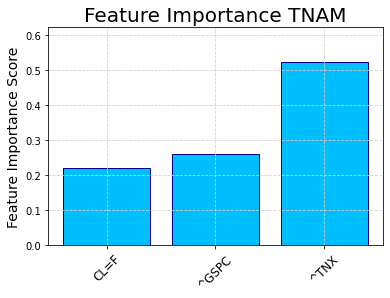

In [26]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize the feature importance scores
plt.bar(range(X_train.shape[1]), permutation_scores, color='#00BFFF', edgecolor='#00008B')
# Set the x-axis ticks to the names of the dataset features and rotate them for better readability
plt.xticks(range(X_train.shape[1]), data.columns, rotation=45, fontsize=12)
# Set the title of the chart to 'Feature Importance TNAM' and increase the font size
plt.title('Feature Importance TNAM', fontsize=20)
# Set the y-axis label to 'Feature Importance Score' and increase the font size
plt.ylabel('Feature Importance Score', fontsize=14)
# Set the y-axis limits to 0 and the maximum feature importance score plus 0.1
plt.ylim(0, max(permutation_scores)+0.1)
# Add a grid to the chart to improve readability and save the chart as an image file
plt.grid(visible=True, linestyle='--', color='#D3D3D3')
plt.savefig('feature_importance TNAM.png', bbox_inches='tight')

plt.show()


In [27]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 39.2 MB/s eta 0:00:00


Exact explainer: 760it [01:22,  9.07it/s]                         


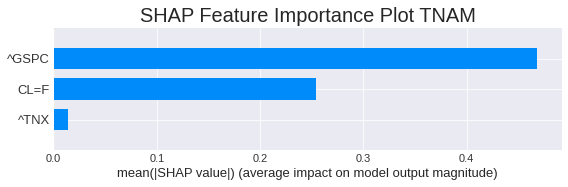

In [28]:
import shap
import matplotlib.pyplot as plt

# Create an explainer object to calculate the SHAP values
explainer = shap.Explainer(TNAM, X_test)
shap_values = explainer(X_test)

# Set the plot style to a more visually appealing style
plt.style.use('seaborn-darkgrid')

# Set the plot title
plt.title('SHAP Feature Importance Plot TNAM', fontsize=20)

# Create the bar plot of the feature importances
shap.summary_plot(shap_values, X_test, feature_names=['CL=F','^GSPC', '^TNX'], plot_type='bar')